In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

379086/379086 [==============================] - 22s 58us/step - loss: 11.5099 - rec_loss: 17.7815 - kl_loss: 4.1462 - val_loss: 13.5143 - val_rec_loss: 23.8111 - val_kl_loss: 2.7962
Epoch 17/150
379086/379086 [==============================] - 22s 58us/step - loss: 11.3857 - rec_loss: 17.5778 - kl_loss: 4.1403 - val_loss: 13.4971 - val_rec_loss: 23.7142 - val_kl_loss: 2.8694
Epoch 18/150
379086/379086 [==============================] - 22s 57us/step - loss: 11.3400 - rec_loss: 17.5035 - kl_loss: 4.1414 - val_loss: 13.5039 - val_rec_loss: 23.5338 - val_kl_loss: 3.0810
Epoch 19/150
379086/379086 [==============================] - 22s 58us/step - loss: 11.3625 - rec_loss: 17.5644 - kl_loss: 4.1352 - val_loss: 13.2650 - val_rec_loss: 23.2802 - val_kl_loss: 2.8629
Epoch 20/150
379086/379086 [==============================] - 22s 58us/step - loss: 11.3166 - rec_loss: 17.4769 - kl_loss: 4.1409 - val_loss: 13.4282 - val_rec_loss: 23.4962 - val_kl_loss: 2.9828
Epoch 21/150
379086/379086 [=====

Epoch 58/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.8524 - rec_loss: 16.6465 - kl_loss: 4.2112 - val_loss: 13.1612 - val_rec_loss: 23.1051 - val_kl_loss: 2.9038
Epoch 59/150
379086/379086 [==============================] - 21s 57us/step - loss: 10.8317 - rec_loss: 16.6040 - kl_loss: 4.2113 - val_loss: 13.1291 - val_rec_loss: 23.0459 - val_kl_loss: 2.8906
Epoch 60/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.8002 - rec_loss: 16.5302 - kl_loss: 4.2196 - val_loss: 13.0487 - val_rec_loss: 22.9153 - val_kl_loss: 2.8728
Epoch 61/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.8793 - rec_loss: 16.6922 - kl_loss: 4.2175 - val_loss: 13.0629 - val_rec_loss: 22.9221 - val_kl_loss: 2.8929
Epoch 62/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.8597 - rec_loss: 16.6529 - kl_loss: 4.2216 - val_loss: 13.2499 - val_rec_loss: 23.2482 - val_kl_loss: 2.9402
Epoch 63/150
379086/

Epoch 100/150
379086/379086 [==============================] - 22s 58us/step - loss: 10.8015 - rec_loss: 16.7202 - kl_loss: 4.1542 - val_loss: 13.0988 - val_rec_loss: 23.1081 - val_kl_loss: 2.7912
Epoch 101/150
379086/379086 [==============================] - 22s 58us/step - loss: 10.7748 - rec_loss: 16.6554 - kl_loss: 4.1661 - val_loss: 13.0127 - val_rec_loss: 22.9694 - val_kl_loss: 2.7639
Epoch 102/150
379086/379086 [==============================] - 22s 58us/step - loss: 10.8109 - rec_loss: 16.7391 - kl_loss: 4.1524 - val_loss: 13.0291 - val_rec_loss: 23.0440 - val_kl_loss: 2.7181
Epoch 103/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.8280 - rec_loss: 16.7643 - kl_loss: 4.1601 - val_loss: 12.9795 - val_rec_loss: 22.8908 - val_kl_loss: 2.7621
Epoch 104/150
379086/379086 [==============================] - 22s 57us/step - loss: 10.7806 - rec_loss: 16.6883 - kl_loss: 4.1458 - val_loss: 13.0030 - val_rec_loss: 23.0189 - val_kl_loss: 2.6891
Epoch 105/150
3

379086/379086 [==============================] - 22s 58us/step - loss: 11.6520 - rec_loss: 18.2811 - kl_loss: 4.2935 - val_loss: 13.0911 - val_rec_loss: 23.2005 - val_kl_loss: 2.6595
Epoch 142/150
379086/379086 [==============================] - 22s 58us/step - loss: 11.3284 - rec_loss: 17.7132 - kl_loss: 4.2389 - val_loss: 13.1836 - val_rec_loss: 23.3329 - val_kl_loss: 2.7223
Epoch 143/150
379086/379086 [==============================] - 22s 57us/step - loss: 11.2140 - rec_loss: 17.5462 - kl_loss: 4.1970 - val_loss: 13.1910 - val_rec_loss: 23.0329 - val_kl_loss: 3.0529
Epoch 144/150
379086/379086 [==============================] - 22s 57us/step - loss: 11.1363 - rec_loss: 17.3962 - kl_loss: 4.1950 - val_loss: 13.0200 - val_rec_loss: 23.0736 - val_kl_loss: 2.6753
Epoch 145/150
379086/379086 [==============================] - 22s 57us/step - loss: 11.1162 - rec_loss: 17.3738 - kl_loss: 4.1887 - val_loss: 13.0974 - val_rec_loss: 23.0866 - val_kl_loss: 2.8099
Epoch 146/150
379086/379086 [

379086/379086 [==============================] - 80s 211us/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0428 - val_accuracy: 0.9848
Epoch 42/50
379086/379086 [==============================] - 80s 212us/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 43/50
379086/379086 [==============================] - 81s 212us/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0426 - val_accuracy: 0.9853
Epoch 44/50
379086/379086 [==============================] - 86s 226us/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0422 - val_accuracy: 0.9847
Epoch 45/50
379086/379086 [==============================] - 77s 202us/step - loss: 0.0409 - accuracy: 0.9876 - val_loss: 0.0465 - val_accuracy: 0.9841
Epoch 47/50
379086/379086 [==============================] - 74s 197us/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0433 - val_accuracy: 0.9849
Epoch 49/50
379086/379086 [==============================] - 74s 196us/step - loss: 0.0408 - accurac

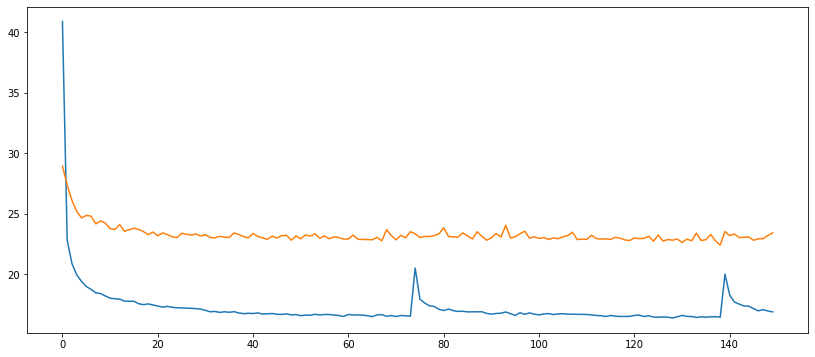

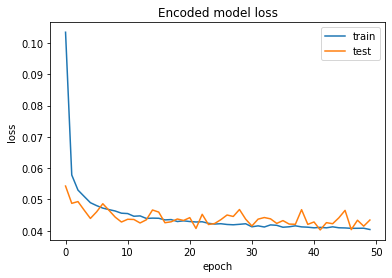

Overall accuracy of Convolutional Neural Network model: 0.9846949523889779


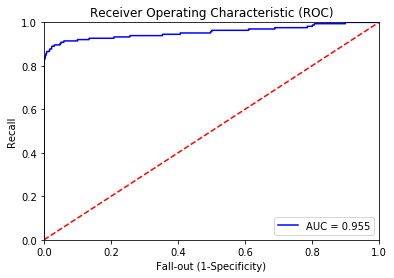

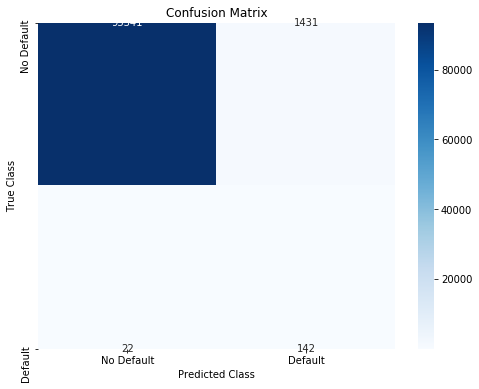

AUC(ROC): 0.9253771310451888
Precision: 0.09027336300063572
Recall: 0.8658536585365854
F1 score: 0.16350028785261944
False positives: 1431
True positives: 142
False negatives: 22
True negatives: 93341
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

379086/379086 [==============================] - 21s 55us/step - loss: 12.0865 - rec_loss: 18.6966 - kl_loss: 4.4008 - val_loss: 13.8386 - val_rec_loss: 24.4333 - val_kl_loss: 2.7591
Epoch 17/150
379086/379086 [==============================] - 21s 55us/step - loss: 13.4223 - rec_loss: 21.1181 - kl_loss: 4.5292 - val_loss: 14.7249 - val_rec_loss: 26.0265 - val_kl_loss: 2.8655
Epoch 18/150
379086/379086 [==============================] - 21s 55us/step - loss: 12.4963 - rec_loss: 19.4238 - kl_loss: 4.4466 - val_loss: 13.9012 - val_rec_loss: 24.5007 - val_kl_loss: 2.7909
Epoch 19/150
379086/379086 [==============================] - 21s 55us/step - loss: 11.9994 - rec_loss: 18.5574 - kl_loss: 4.4055 - val_loss: 14.8128 - val_rec_loss: 26.3101 - val_kl_loss: 2.8353
Epoch 20/150
379086/379086 [==============================] - 21s 55us/step - loss: 13.0588 - rec_loss: 20.4637 - kl_loss: 4.5421 - val_loss: 14.1036 - val_rec_loss: 24.9416 - val_kl_loss: 2.7484
Epoch 21/150
379086/379086 [=====

Epoch 58/150
379086/379086 [==============================] - 21s 55us/step - loss: 11.2898 - rec_loss: 17.2792 - kl_loss: 4.4210 - val_loss: 13.1015 - val_rec_loss: 23.0464 - val_kl_loss: 2.7831
Epoch 59/150
379086/379086 [==============================] - 21s 55us/step - loss: 11.3076 - rec_loss: 17.3199 - kl_loss: 4.4171 - val_loss: 13.1919 - val_rec_loss: 23.1910 - val_kl_loss: 2.8326
Epoch 60/150
379086/379086 [==============================] - 21s 55us/step - loss: 11.2547 - rec_loss: 17.2284 - kl_loss: 4.4087 - val_loss: 12.8907 - val_rec_loss: 22.5812 - val_kl_loss: 2.8272
Epoch 61/150
379086/379086 [==============================] - 21s 55us/step - loss: 11.2581 - rec_loss: 17.2326 - kl_loss: 4.4079 - val_loss: 12.8845 - val_rec_loss: 22.7413 - val_kl_loss: 2.6692
Epoch 62/150
379086/379086 [==============================] - 21s 56us/step - loss: 11.2571 - rec_loss: 17.2268 - kl_loss: 4.4111 - val_loss: 13.3271 - val_rec_loss: 23.4169 - val_kl_loss: 2.8803
Epoch 63/150
379086/

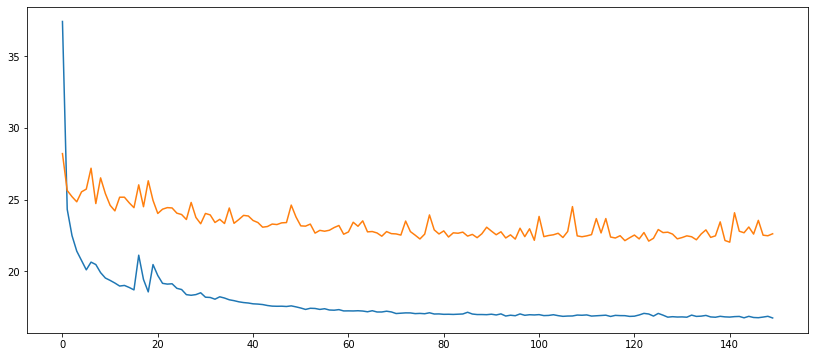

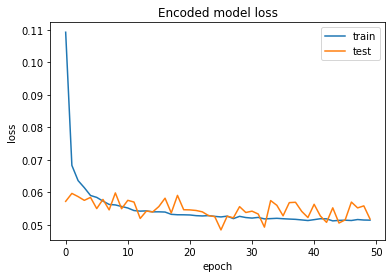

Overall accuracy of Convolutional Neural Network model: 0.979596780989298


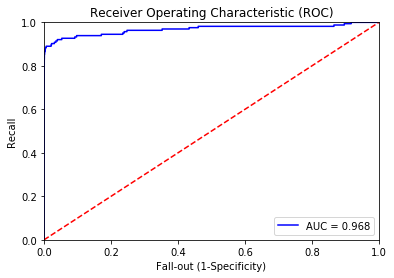

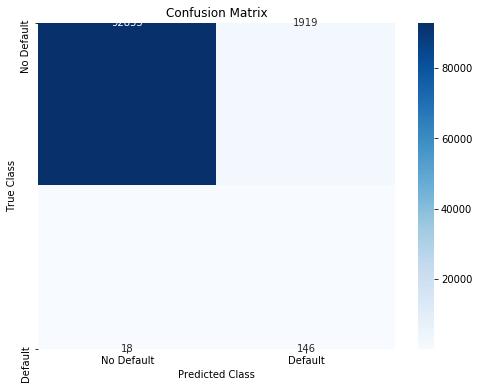

AUC(ROC): 0.9349976529035539
Precision: 0.07070217917675545
Recall: 0.8902439024390244
F1 score: 0.1310004486316734
False positives: 1919
True positives: 146
False negatives: 18
True negatives: 92853
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379088, 30)
After OverSampling, the shape of train_y: (379088,) 

After OverSampling, counts of label '1': 189544
After OverSampling, counts of label '0': 189544
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

379088/379088 [==============================] - 21s 56us/step - loss: 11.6136 - rec_loss: 18.0331 - kl_loss: 4.1350 - val_loss: 13.2288 - val_rec_loss: 23.1541 - val_kl_loss: 2.9221
Epoch 17/150
379088/379088 [==============================] - 21s 56us/step - loss: 11.5437 - rec_loss: 17.9355 - kl_loss: 4.1056 - val_loss: 13.1666 - val_rec_loss: 23.0669 - val_kl_loss: 2.8918
Epoch 18/150
379088/379088 [==============================] - 21s 56us/step - loss: 11.5481 - rec_loss: 17.9288 - kl_loss: 4.1228 - val_loss: 13.2667 - val_rec_loss: 23.1183 - val_kl_loss: 3.0399
Epoch 19/150
379088/379088 [==============================] - 21s 57us/step - loss: 11.4544 - rec_loss: 17.7319 - kl_loss: 4.1343 - val_loss: 13.1402 - val_rec_loss: 22.9122 - val_kl_loss: 3.0069
Epoch 20/150
379088/379088 [==============================] - 21s 57us/step - loss: 11.4175 - rec_loss: 17.6762 - kl_loss: 4.1206 - val_loss: 13.0993 - val_rec_loss: 22.7690 - val_kl_loss: 3.0569
Epoch 21/150
379088/379088 [=====

379088/379088 [==============================] - 21s 56us/step - loss: 11.1908 - rec_loss: 17.3773 - kl_loss: 4.1698 - val_loss: 13.0218 - val_rec_loss: 22.7710 - val_kl_loss: 2.9212
Epoch 58/150
379088/379088 [==============================] - 21s 56us/step - loss: 11.1283 - rec_loss: 17.2877 - kl_loss: 4.1503 - val_loss: 13.0921 - val_rec_loss: 22.9002 - val_kl_loss: 2.9320
Epoch 59/150
379088/379088 [==============================] - 21s 56us/step - loss: 11.1545 - rec_loss: 17.3253 - kl_loss: 4.1565 - val_loss: 12.8993 - val_rec_loss: 22.4323 - val_kl_loss: 3.0031
Epoch 60/150
379088/379088 [==============================] - 21s 57us/step - loss: 11.2938 - rec_loss: 17.5794 - kl_loss: 4.1783 - val_loss: 13.0021 - val_rec_loss: 22.6434 - val_kl_loss: 3.0056
Epoch 61/150
379088/379088 [==============================] - 21s 57us/step - loss: 11.1296 - rec_loss: 17.2659 - kl_loss: 4.1627 - val_loss: 13.0172 - val_rec_loss: 22.6789 - val_kl_loss: 2.9914
Epoch 62/150
379088/379088 [=====

379088/379088 [==============================] - 21s 56us/step - loss: 10.8702 - rec_loss: 16.7661 - kl_loss: 4.1907 - val_loss: 13.4274 - val_rec_loss: 23.3123 - val_kl_loss: 3.1876
Epoch 99/150
379088/379088 [==============================] - 21s 56us/step - loss: 10.8478 - rec_loss: 16.7061 - kl_loss: 4.2007 - val_loss: 12.8137 - val_rec_loss: 22.4260 - val_kl_loss: 2.8414
Epoch 100/150
379088/379088 [==============================] - 21s 57us/step - loss: 10.9646 - rec_loss: 16.9399 - kl_loss: 4.1983 - val_loss: 12.7544 - val_rec_loss: 22.3187 - val_kl_loss: 2.8411
Epoch 101/150
379088/379088 [==============================] - 21s 56us/step - loss: 10.8832 - rec_loss: 16.7893 - kl_loss: 4.1851 - val_loss: 12.8029 - val_rec_loss: 22.4095 - val_kl_loss: 2.8570
Epoch 102/150
379088/379088 [==============================] - 21s 56us/step - loss: 10.9251 - rec_loss: 16.8500 - kl_loss: 4.2144 - val_loss: 12.8606 - val_rec_loss: 22.3549 - val_kl_loss: 3.0233
Epoch 103/150
379088/379088 [=

Epoch 140/150
379088/379088 [==============================] - 21s 57us/step - loss: 10.7455 - rec_loss: 16.5213 - kl_loss: 4.1978 - val_loss: 12.7337 - val_rec_loss: 22.0767 - val_kl_loss: 3.0680
Epoch 141/150
379088/379088 [==============================] - 21s 57us/step - loss: 10.8535 - rec_loss: 16.7545 - kl_loss: 4.1822 - val_loss: 12.6482 - val_rec_loss: 22.0573 - val_kl_loss: 2.9029
Epoch 142/150
379088/379088 [==============================] - 21s 56us/step - loss: 10.7370 - rec_loss: 16.5140 - kl_loss: 4.1957 - val_loss: 12.5879 - val_rec_loss: 21.9462 - val_kl_loss: 2.9100
Epoch 143/150
379088/379088 [==============================] - 21s 56us/step - loss: 10.7263 - rec_loss: 16.4955 - kl_loss: 4.1933 - val_loss: 12.8390 - val_rec_loss: 22.4776 - val_kl_loss: 2.8776
Epoch 144/150
379088/379088 [==============================] - 21s 57us/step - loss: 10.6833 - rec_loss: 16.4173 - kl_loss: 4.1897 - val_loss: 12.8759 - val_rec_loss: 22.5247 - val_kl_loss: 2.8958
Epoch 145/150
3

379088/379088 [==============================] - 70s 183us/step - loss: 0.0466 - accuracy: 0.9843 - val_loss: 0.0519 - val_accuracy: 0.9803
Epoch 43/50
379088/379088 [==============================] - 70s 185us/step - loss: 0.0467 - accuracy: 0.9842 - val_loss: 0.0425 - val_accuracy: 0.9837
Epoch 44/50
379088/379088 [==============================] - 70s 186us/step - loss: 0.0469 - accuracy: 0.9841 - val_loss: 0.0491 - val_accuracy: 0.9819
Epoch 45/50
379088/379088 [==============================] - 70s 185us/step - loss: 0.0467 - accuracy: 0.9845 - val_loss: 0.0454 - val_accuracy: 0.9824
Epoch 46/50
379088/379088 [==============================] - 70s 185us/step - loss: 0.0465 - accuracy: 0.9845 - val_loss: 0.0493 - val_accuracy: 0.9805
Epoch 47/50
379088/379088 [==============================] - 70s 186us/step - loss: 0.0462 - accuracy: 0.9845 - val_loss: 0.0500 - val_accuracy: 0.9810
Epoch 48/50
379088/379088 [==============================] - 71s 186us/step - loss: 0.0465 - accurac

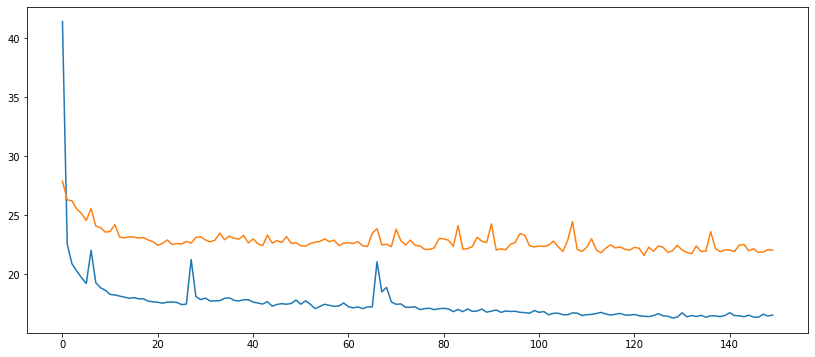

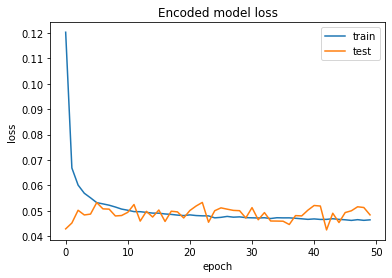

Overall accuracy of Convolutional Neural Network model: 0.9815452678148207


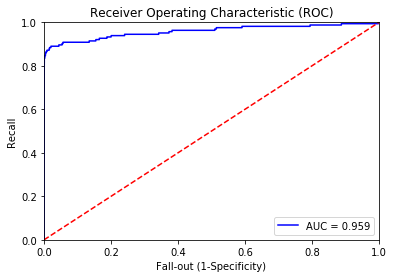

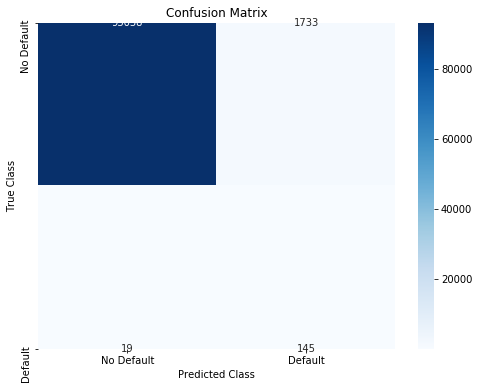

AUC(ROC): 0.9329300784355408
Precision: 0.077209797657082
Recall: 0.8841463414634146
F1 score: 0.14201762977473062
False positives: 1733
True positives: 145
False negatives: 19
True negatives: 93038


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = BorderlineSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 93077.33333333333
Average fp = 1694.3333333333333
Average fn = 19.666666666666668
Average tp = 144.33333333333334
Average Precision = 7.85%
Average Recall = 88.01%
Average F1 score = 14.41%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 279232
Total fp: 5083
 Total fn:59
 Total tp:433
Total Precision = 0.07849891225525743
Total Recall = 0.8800813008130082
Total F1_score = 0.14414114513981358
